# 获取数据

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=load_boston()
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

# adaboost回归

In [3]:
# 使用AdaBoost回归模型
regressor=AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("均方误差 = ",mse)

均方误差 =  18.081571629472442


# 与决策树比较

In [4]:
dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)
pred_y = dt.predict(test_x)
dt_err= mean_squared_error(test_y, pred_y)
print("均方误差 = ",dt_err)

均方误差 =  26.257401574803154


# 对比两种算法情况（copy）

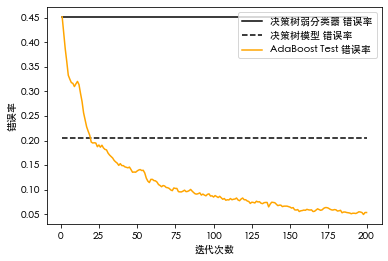

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['Heiti TC']# 显示中文字体
# 设置AdaBoost迭代次数
n_estimators=200
# 使用
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从12000个数据中取前2000行作为测试集，其余作为训练集
train_x, train_y = X[2000:],y[2000:]
test_x, test_y = X[:2000],y[:2000]
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)
# 三个分类器的错误率可视化
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i为迭代次数, pred_y为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的AdaBoost错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()